In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [101]:
data = pd.read_csv('C:/Users/User/PycharmProjects/pythonProject8/hack/data/train.csv')
data

,datetime,Номер скважины,Дебит нефти,Давление забойное,x,y,Объем жидкости,Объем нефти,Активная мощность (ТМ),Время работы (ТМ),Газовый фактор рабочий (ТМ),Давление буферное,Давление забойное от Hд,Давление забойное от Pпр,Давление линейное (ТМ),Давление на входе ЭЦН (ТМ),Дебит газа (ТМ),Дебит газа попутного,Дебит жидкости (ТМ),Коэффициент мощности (ТМ)
0,1990-08-01,0,19.939,NaN,18670.86,5714.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-08-02,0,19.939,39.064454,18670.86,5714.86,NaN,NaN,50.851351,9.600833,NaN,NaN,33.913336,39.064454,1.887872,30.293676,3843.746667,24.25,24.250000,98.534314
2,1990-08-03,0,21.172,39.064487,18670.86,5714.86,NaN,NaN,52.353846,NaN,NaN,NaN,33.806090,39.064487,1.885714,30.261774,3900.955000,25.75,25.833333,99.139785
3,1990-08-04,0,22.529,38.965297,18670.86,5714.86,NaN,NaN,51.242424,9.600000,NaN,NaN,33.695717,38.965297,1.875851,30.212768,3874.505000,27.40,27.933333,98.744318
4,1990-08-05,0,22.529,38.766822,18670.86,5714.86,NaN,NaN,50.910256,9.563889,NaN,NaN,33.695717,38.766822,1.873163,30.109119,3853.696667,27.40,27.400000,98.419689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67131,1992-04-07,105,7.646,122.180672,14230.22,22456.04,NaN,NaN,252.298969,24.000000,NaN,NaN,122.180672,99.535735,11.548286,20.536082,NaN,451.36,451.358333,72.876289
67132,1992-04-08,105,7.639,122.182381,14230.22,22456.04,15472.802,161.526,251.647423,24.000000,NaN,NaN,122.182381,99.202518,11.556784,20.459184,NaN,450.97,450.972727,72.855670
67133,1992-04-09,105,7.657,122.183551,14230.22,22456.04,NaN,NaN,251.713542,24.000000,NaN,13.0,122.183551,99.119048,11.583542,20.104167,NaN,452.03,452.027273,72.302083
67134,1992-04-10,105,7.654,122.180372,14230.22,22456.04,NaN,NaN,251.504167,24.000000,NaN,NaN,122.180372,98.744075,11.601396,20.052083,NaN,451.85,451.850000,72.041667


In [3]:
data = data[['Номер скважины', 'x', 'y']]
data = data.drop_duplicates()
data

,Номер скважины,x,y
0,0,18670.86,5714.86
620,1,19964.69,10000.63
1240,2,20541.78,9806.47
1860,3,12578.90,7805.61
2480,4,9828.65,18016.98
...,...,...,...
63892,101,10224.10,22779.71
64560,102,13048.12,11237.06
65180,103,18886.91,9959.39
65848,104,19837.62,10793.40


In [4]:
points = data[['x','y']].values
points

array([[18670.86,  5714.86],
       [19964.69, 10000.63],
       [20541.78,  9806.47],
       [12578.9 ,  7805.61],
       [ 9828.65, 18016.98],
       [18713.19,  9731.53],
       [12146.24, 22686.24],
       [ 9427.28, 18515.75],
       [19494.13,  8660.68],
       [13713.11,  6761.05],
       [10209.97, 19439.34],
       [10842.2 , 18253.31],
       [10829.42, 17523.05],
       [19750.91,  9168.53],
       [13544.31,  6008.09],
       [10803.27, 13702.53],
       [11455.62, 23154.97],
       [14960.92,  6996.94],
       [16940.91, 21812.41],
       [14864.06, 18137.62],
       [11626.95, 19643.91],
       [10029.13, 14059.19],
       [11193.62,  7788.12],
       [11007.65, 11304.78],
       [17256.64,  7841.19],
       [ 9917.76, 20058.23],
       [14981.71,  6632.83],
       [14517.83, 11832.26],
       [13638.61,  7666.06],
       [12682.75, 13925.15],
       [20961.48,  9546.76],
       [16086.6 , 11096.66],
       [18617.62, 12120.75],
       [10360.82, 31206.49],
       [ 9490.

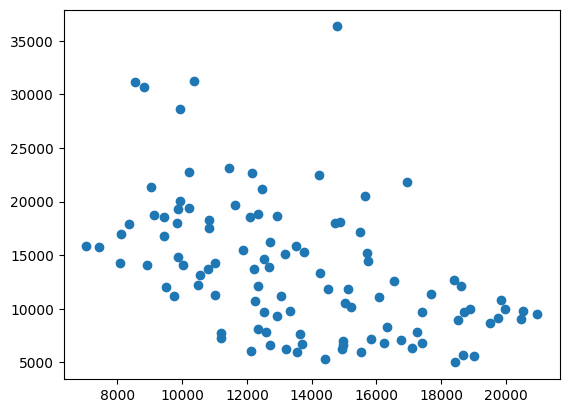

In [8]:
plt.scatter(points[:,0], points[:,1])

In [69]:
from sklearn.cluster import KMeans #Разобьем на 4 кластера, чтобы оценить сходства параметров скважин в одном кластере
beg_centers = np.array([[9000,33000],[12000,18000],[15000,36000],[16000,10000]])
kmeans = KMeans(n_clusters=4, init=beg_centers).fit(points)
kmeans

C:\Users\User\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


KMeans(init=array([[ 9000, 33000],
       [12000, 18000],
       [15000, 36000],
       [16000, 10000]]),
       n_clusters=4)

In [70]:
kmeans.cluster_centers_

array([[ 9415.385     , 30418.7825    ],
       [11507.54142857, 17041.62612245],
       [14777.95      , 36325.65      ],
       [15832.73711538,  8698.38115385]])

In [71]:
kmeans.labels_

array([3, 3, 3, 3, 1, 3, 1, 1, 3, 3, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1,
       3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 0, 1, 1, 3, 1, 3, 1, 3, 3, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3,
       1, 1, 3, 1, 1, 2, 3, 1, 1, 3, 0, 1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3,
       1, 1, 1, 3, 1, 1, 0, 1, 3, 3, 1, 1, 3, 1, 3, 3, 3, 1])

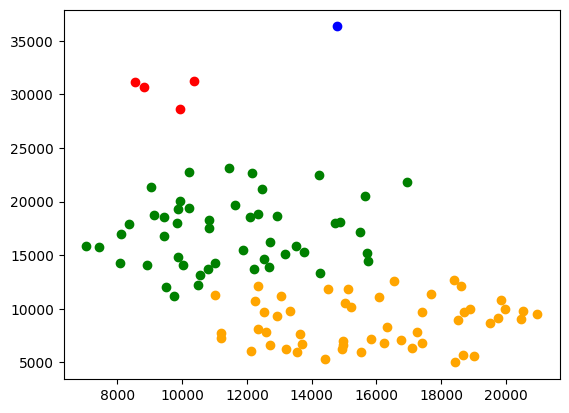

In [72]:
colors = ['red', 'green', 'blue', 'orange', 'yellow']
well_clusters = {}
for k in range(5):
    wells = []
    for i in range(106):
        if kmeans.labels_[i] == k:
            wells.append(i)
            plt.scatter(points[i, 0], points[i, 1], color=colors[k])
    well_clusters[k] = wells
plt.show()

In [73]:
well_clusters

{0: [33, 45, 76, 94],
 1: [4,
  6,
  7,
  10,
  11,
  12,
  15,
  16,
  18,
  19,
  20,
  21,
  25,
  29,
  34,
  35,
  37,
  39,
  42,
  43,
  44,
  46,
  47,
  48,
  49,
  50,
  53,
  54,
  59,
  66,
  67,
  69,
  70,
  73,
  74,
  77,
  80,
  84,
  85,
  88,
  89,
  90,
  92,
  93,
  95,
  98,
  99,
  101,
  105],
 2: [71],
 3: [0,
  1,
  2,
  3,
  5,
  8,
  9,
  13,
  14,
  17,
  22,
  23,
  24,
  26,
  27,
  28,
  30,
  31,
  32,
  36,
  38,
  40,
  41,
  51,
  52,
  55,
  56,
  57,
  58,
  60,
  61,
  62,
  63,
  64,
  65,
  68,
  72,
  75,
  78,
  79,
  81,
  82,
  83,
  86,
  87,
  91,
  96,
  97,
  100,
  102,
  103,
  104],
 4: []}

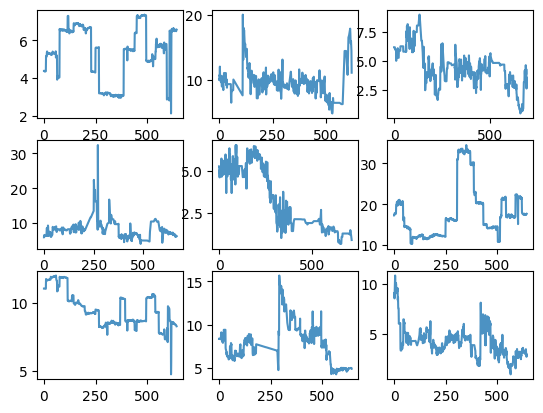

In [115]:
for i in range(1,10): #Визуальная оценка параметров скважин из одного кластера
    y = data[data['Номер скважины'] == well_clusters[1][i]]['Дебит нефти'].values
    x = list(range(len(y)))
    plt.subplot(3, 3, i)
    plt.plot(x, y, alpha=0.8)

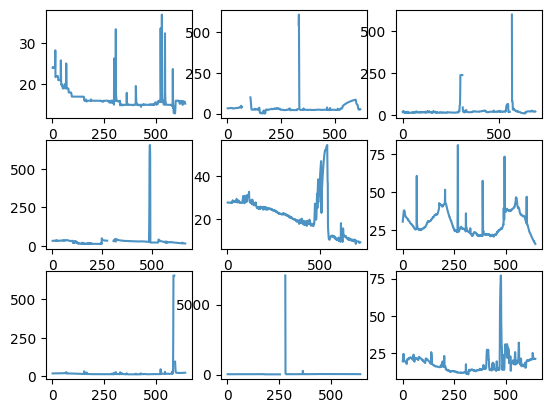

In [118]:
for i in range(1,10):
    y = data[data['Номер скважины'] == well_clusters[1][i]][''].values
    x = list(range(len(y)))
    plt.subplot(3, 3, i)
    plt.plot(x, y, alpha=0.8)

In [ ]:
#Также можно оценить корреляции отдельных параметров одной скважины и нескольких


In [120]:
from scipy.optimize import curve_fit
from tqdm import tqdm

def hyperbolic_equation(t: float, qi: float, b: float, di: float) -> float:
    return qi / ((1.0 + b * di * t) ** (1.0 / b))

def make_prediction(historical_values: pd.DataFrame):

    time_series = historical_values['Дебит нефти'].values
    peak_index = np.argmax(time_series)
    qi = time_series[peak_index]

    latest_period = time_series[peak_index:]
    days = np.array([i for i in range(1, len(latest_period) + 1)], dtype=np.float)

    popt, pcov = curve_fit(hyperbolic_equation, days, latest_period, bounds=(0, [qi, 2, 20.01]))
    q, b, di = popt
    print(f'Fit Curve Variables: qi={q}, b={b}, di={di}')

    forecast = hyperbolic_equation(days, *popt)

    #print(historical_values)
    maximums = historical_values[historical_values['Дебит нефти'] == qi]['datetime']
    start = maximums.iloc[0]
    date_range = pd.date_range(start=start, freq='1D', periods=len(latest_period))
    forecast_df = pd.DataFrame({'datetime': date_range, 'forecast': forecast, 'Дебит нефти' : latest_period})
    return forecast_df

In [121]:
def process_data():
    train_path = 'C:/Users/User/PycharmProjects/pythonProject8/hack/data/train.csv'
    train_df = pd.read_csv(train_path)
    print(f'Loaded training data. Shape: {train_df.shape}')

    wells = list(train_df['Номер скважины'].unique())
    print(f'Number of unique wells: {len(wells)}')

    all_forecasts = []
    with tqdm(total=len(wells)) as pbar:
        for well in wells:
            #print(f'Started processing well ID: {well}')
            well_df = train_df[train_df['Номер скважины'] == well]

            #print(len(well_df))
            # Make prediction using Decline Curve Analysis
            forecats_df = make_prediction(well_df)
            forecats_df['Номер скважины'] = [well] * len(forecats_df)
            all_forecasts.append(forecats_df)

            pbar.update(1)

    all_forecasts = pd.concat(all_forecasts)
    print(f'Completed data processing. Forecast shape: {all_forecasts.shape}')
    print(f'Number of unique wells: {len(all_forecasts["Номер скважины"].unique())}')

    all_forecasts.to_csv('baseline_new.csv', index=False, encoding="utf-8")
    print('Saved forecast to "baseline_new.csv"')

In [122]:
process_data() #Добавим аппроксимацию данных в датасет

Loaded training data. Shape: (67136, 20)
Number of unique wells: 106


  0%|          | 0/106 [00:00<?, ?it/s]C:\Users\User\AppData\Local\Temp\ipykernel_1468\3392647493.py:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  days = np.array([i for i in range(1, len(latest_period) + 1)], dtype=np.float)
  1%|          | 1/106 [00:00<00:12,  8.19it/s]

Fit Curve Variables: qi=24.819952120456257, b=3.739117760127004e-07, di=0.00242004752607022
Fit Curve Variables: qi=23.07755298397216, b=1.9999999999999998, di=0.0026659764047701168
Fit Curve Variables: qi=36.41452962476285, b=1.230038252785122e-11, di=0.0013303392038184754
Fit Curve Variables: qi=14.5451939082825, b=1.9999999999999998, di=0.00033991254192848727
Fit Curve Variables: qi=12.873921588006377, b=1.3456250388516562, di=0.002074637418369397
Fit Curve Variables: qi=19.2731918285484, b=2.2357978249370658e-14, di=0.0015636365988301773
Fit Curve Variables: qi=5.496984106427431, b=2.1331432762394797e-06, di=2.094182174344773e-23


  9%|▉         | 10/106 [00:00<00:01, 50.37it/s]

Fit Curve Variables: qi=11.06648715156702, b=1.9999999999999998, di=0.0006771349199452477
Fit Curve Variables: qi=16.398373306811898, b=1.9999999999999998, di=0.0012424357230354534
Fit Curve Variables: qi=72.81269893358646, b=8.61879512998455e-15, di=0.0010726323086657718
Fit Curve Variables: qi=4.905831494194249, b=2.2412360245551905e-08, di=0.00073406445151189
Fit Curve Variables: qi=9.930373728410942, b=1.9999999999995741, di=0.0016601008830131783
Fit Curve Variables: qi=6.503815959169745, b=5.990646815636e-10, di=0.0030421640019230737
Fit Curve Variables: qi=11.09999999999999, b=1.8453253597650703, di=0.0027240602815959843
Fit Curve Variables: qi=24.608477177503172, b=1.9999999999999998, di=0.0008292319408851757


 19%|█▉        | 20/106 [00:00<00:01, 69.62it/s]

Fit Curve Variables: qi=31.76936513303553, b=1.9999999999999998, di=0.007266673292125427
Fit Curve Variables: qi=10.86322972727085, b=1.9999999999999993, di=0.0006672087912637729
Fit Curve Variables: qi=34.802347827992, b=5.958399927731044e-11, di=0.0014129715437371977
Fit Curve Variables: qi=13.372548964505665, b=1.5483541645709476e-09, di=0.003066121751399074
Fit Curve Variables: qi=6.198409659942002, b=1.999999999999992, di=0.0023980527907546513
Fit Curve Variables: qi=1.6951673296368943, b=2.114759842240061e-10, di=0.000744490102434919
Fit Curve Variables: qi=5.620999999858009, b=3.474863705633743e-11, di=0.01801756365022198
Fit Curve Variables: qi=16.73542300885017, b=1.9999999999999998, di=0.0004282346726250788
Fit Curve Variables: qi=35.61031740135942, b=0.6879239685482081, di=0.004745908728254793
Fit Curve Variables: qi=19.925765667018744, b=7.8159382176546e-09, di=0.0028256430710153573
Fit Curve Variables: qi=21.802999996961965, b=1.999999999999557, di=0.00696460831975823
Fit 

 29%|██▉       | 31/106 [00:00<00:00, 83.36it/s]

Fit Curve Variables: qi=23.360182486041662, b=1.9999999999997446, di=0.005049200543806585
Fit Curve Variables: qi=20.468495835768415, b=6.547015429586897e-13, di=0.004808749877242251
Fit Curve Variables: qi=31.999495911127365, b=1.9999999999999998, di=0.006428434669360027
Fit Curve Variables: qi=5.869999999999481, b=0.6124049666757769, di=0.0069838960558339025
Fit Curve Variables: qi=13.828655786327456, b=1.9999999999999998, di=0.004849875525135086
Fit Curve Variables: qi=6.821999999999999, b=1.7986094766352698, di=0.020067018209554144
Fit Curve Variables: qi=9.31369681531804, b=0.896445531054991, di=0.0016401742132414953
Fit Curve Variables: qi=8.945497945152697, b=1.9999999999999998, di=0.006750964823646231
Fit Curve Variables: qi=13.313184091496526, b=1.9999999999999998, di=0.056117159184179415
Fit Curve Variables: qi=45.496972779368974, b=0.5499538024168419, di=0.00380797341875287


 41%|████      | 43/106 [00:00<00:00, 93.88it/s]

Fit Curve Variables: qi=15.201861742914149, b=5.068370542112172e-11, di=0.002624314985838401
Fit Curve Variables: qi=6.9146778224022505, b=1.9999999999999891, di=0.0010950182320344213
Fit Curve Variables: qi=13.865999999988734, b=2.2840501436129935e-08, di=0.07458799445979894
Fit Curve Variables: qi=18.41578331381404, b=1.9999999977651068, di=5.2749594656910767e-14
Fit Curve Variables: qi=16.53506523950579, b=1.9999999999999987, di=0.006691545123253976
Fit Curve Variables: qi=6.109352419406617, b=1.9999999999999998, di=0.0006860748629845046
Fit Curve Variables: qi=9.875472995131249, b=7.702003109457701e-12, di=0.0005017080847851972
Fit Curve Variables: qi=7.5629999999995094, b=0.2947648540145859, di=0.011290025066573704
Fit Curve Variables: qi=23.965033181306037, b=1.9999999999999936, di=0.006373370649224376
Fit Curve Variables: qi=6.157907291989376, b=1.533459087136519e-08, di=0.003986074160911636
Fit Curve Variables: qi=7.67412296833475, b=2.2444919293872012e-07, di=0.014030059893201

 51%|█████     | 54/106 [00:00<00:00, 99.09it/s]

Fit Curve Variables: qi=15.967644239084514, b=1.9999999999999998, di=0.00178912524920225
Fit Curve Variables: qi=13.223340264384676, b=1.9999999999999993, di=0.0013666619704994854
Fit Curve Variables: qi=13.084369265837008, b=1.9999999999999998, di=0.0032917418702230984
Fit Curve Variables: qi=6.414233122233945, b=2.5787621906233477e-07, di=0.020033971211764957
Fit Curve Variables: qi=4.444999999966542, b=1.9999999999634792, di=0.03747639724877454
Fit Curve Variables: qi=33.93148597478804, b=1.9999999999998592, di=0.009411707044889916
Fit Curve Variables: qi=23.39163418685044, b=1.9999999999999998, di=0.0011867533006966425
Fit Curve Variables: qi=16.66695499219499, b=1.9999999999999658, di=0.003450545164022724
Fit Curve Variables: qi=14.67557005065533, b=4.322947489505987e-10, di=0.0011099168542519624
Fit Curve Variables: qi=41.38949113999455, b=1.9999999999977154, di=0.006618021750805385
Fit Curve Variables: qi=13.466977556351877, b=1.9999999999999551, di=0.0033393419588843972


 61%|██████▏   | 65/106 [00:00<00:00, 101.14it/s]

Fit Curve Variables: qi=33.54219891246086, b=3.6395811075735684e-09, di=0.0064001750083375174
Fit Curve Variables: qi=26.09769258001393, b=1.984559423282692, di=0.02097601064640352
Fit Curve Variables: qi=42.67862535576107, b=0.12681059706023326, di=0.001840949368399751
Fit Curve Variables: qi=16.14593765575979, b=1.9999999999999998, di=0.02075730836113361
Fit Curve Variables: qi=22.23199999865131, b=1.9999999999975893, di=0.038339275134527166
Fit Curve Variables: qi=2.3856180725827545, b=1.9999997287698152, di=7.28785397283502e-18
Fit Curve Variables: qi=24.542551223352277, b=1.7952274677301907e-09, di=0.0015391554229367199
Fit Curve Variables: qi=20.89748121067689, b=1.9999999999999998, di=0.021004798384646924
Fit Curve Variables: qi=8.383002416923304, b=5.302522020713643e-09, di=0.006466098546741599
Fit Curve Variables: qi=61.07199999868655, b=1.9999999999999993, di=0.06278184885558429
Fit Curve Variables: qi=26.981956721978175, b=2.6112398115246803e-09, di=0.005660307335869967
Fit 

 74%|███████▎  | 78/106 [00:00<00:00, 107.24it/s]

Fit Curve Variables: qi=3.040328465602718, b=0.00047438120468989986, di=1.3994329651370372e-15
Fit Curve Variables: qi=10.305296768581245, b=1.8287008857283091, di=0.009998154027983281
Fit Curve Variables: qi=13.023999999999997, b=1.9999999999999998, di=0.036142661537900564
Fit Curve Variables: qi=24.7406228579531, b=0.7938420861754021, di=0.0089765030283018
Fit Curve Variables: qi=17.300512263245615, b=2.7830352723217547e-11, di=0.003649826554241815
Fit Curve Variables: qi=11.171600220303763, b=2.3041888408143613e-09, di=2.098791352383505e-05
Fit Curve Variables: qi=40.73499999984177, b=1.088931374102908, di=0.008535968623743732
Fit Curve Variables: qi=14.821150261854758, b=8.071385776588433e-09, di=0.0027144779521799515
Fit Curve Variables: qi=14.492999999999999, b=0.227434954178119, di=0.008314606342331797
Fit Curve Variables: qi=12.849174746724582, b=2.4347470431530786e-08, di=0.0021488243798855893
Fit Curve Variables: qi=10.5130359361196, b=0.3786471942846386, di=0.004691807323461

 85%|████████▍ | 90/106 [00:00<00:00, 110.77it/s]

Fit Curve Variables: qi=9.57678245288841, b=3.5943818389366933e-10, di=0.0007172513321145022
Fit Curve Variables: qi=13.134999999999998, b=0.0871114216663905, di=0.00485473275051512
Fit Curve Variables: qi=46.47595193379119, b=1.999999999999794, di=0.006256478435840033
Fit Curve Variables: qi=4.056564787622777, b=1.9999999999998888, di=0.0020361233149642066
Fit Curve Variables: qi=14.472219527762158, b=0.02723180024667575, di=0.005222645747752231
Fit Curve Variables: qi=8.251999999999821, b=1.999999999999997, di=0.012755308895972593
Fit Curve Variables: qi=6.011249951238992, b=7.67938044905388e-08, di=5.1796309138315854e-05
Fit Curve Variables: qi=12.747431276866967, b=7.993861545516995e-14, di=0.0008009048319320412
Fit Curve Variables: qi=58.904999999999994, b=1.1149752577476544, di=0.40591547987392285
Fit Curve Variables: qi=21.17749901703876, b=1.9999999999999978, di=0.023072634780578263
Fit Curve Variables: qi=25.54395927712889, b=0.8206796032435857, di=0.007810825331839471


100%|██████████| 106/106 [00:01<00:00, 96.79it/s] 


Fit Curve Variables: qi=37.73999999999999, b=1.7268900269400913, di=0.03026561389016121
Fit Curve Variables: qi=6.063628509103456, b=1.9999999999999998, di=0.003118840511743912
Fit Curve Variables: qi=6.852979436769267, b=1.9999999999999998, di=0.014238160553930528
Fit Curve Variables: qi=18.380176971376155, b=1.4825529168674307, di=0.006117312463385638
Fit Curve Variables: qi=9.461999999999904, b=1.7432430779245442e-09, di=0.004928141538498635
Fit Curve Variables: qi=11.884463670599297, b=1.9999999999999998, di=0.003928903648473844
Completed data processing. Forecast shape: (42563, 4)
Number of unique wells: 106
Saved forecast to "baseline_new.csv"


In [165]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

def create_model(series_lenght, features_num):
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(series_lenght, features_num)))
    model.add(LSTM(50))
    model.add(Dense(50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

In [166]:
def create_dataset(table, k):
    size = table.shape[0]
    x_train = []
    y_train = []
    for i in range(size - k):
        x_train.append(table.loc[i:k+i - 1].values)
        y_train.append(table.loc[k+i, 'forecast'])

    return np.array(x_train), np.array(y_train)

In [163]:
def create_table(data, df, well_number):
    baseline = df[df['Номер скважины'] == well_number]
    well = data[data['Номер скважины'] == well_number]

    well['datetime'] = well['datetime'].astype(str)
    baseline['datetime'] = baseline['datetime'].astype(str)

    well.reset_index(drop=True, inplace=True)
    baseline = baseline[['forecast', 'datetime']]
    begin = baseline.iloc[0].forecast

    well = well.merge(right=baseline, on='datetime', how='left') #Добавление столбца forecast

    features = ['Дебит нефти', 'Давление забойное', 'Активная мощность (ТМ)', 'Время работы (ТМ)', 'Давление забойное от Hд', 'Давление линейное (ТМ)', 'Коэффициент мощности (ТМ)', 'forecast']
    well = well[features] #Отбор признаков

    id = well.index[well['forecast'] == begin].tolist()[0] #Заполнение пустых полей для forecast
    for idx, row in well.iterrows():
        if idx != id:
            well.loc[idx, 'forecast'] = row['Дебит нефти']
        else:
            break

    train_well = well.interpolate(method='spline', limit_direction='both', order=1)
    return train_well

In [189]:
def find_min(res):
    min_error = 1000000
    min_id = 0
    for idx, row in train_well.iterrows():
        error = abs(row['Дебит нефти'] - res)
        if error < min_error:
            min_error = error
            min_id = idx
    return min_id


def predict_series(times_0, model):
    times = times_0
    predicts = []
    for i in range(90):
        res = model.predict(times)
        predicts.append(res[0,0])
        min_id = find_min(res[0,0])
        new_times = train_well.loc[min_id].values

        new_times[7] = res[0,0]
        new_times = new_times.reshape(1,8)
        times = np.vstack([times[0], new_times])
        times = times[1:26]
        times = times.reshape(1,25,8)

    return np.array(predicts)

In [175]:
df = pd.read_csv('baseline_new.csv')
model = create_model(25,8) #создание модели для 25 наблюдений и 8 признаков

wells_predicts = {}
for well in well_clusters[0]: #Для нулевого
    train_well = create_table(data, df, well)
    X,Y = create_dataset(train_well, 25) #Создание датасета с серией из 25 наблюдений
    model.fit(X, Y, epochs=500, batch_size=119) #Обучение. Для каждого кластера модель будет создаваться один раз. И дообучаться, чтобы учитывать признаки из скважин того же кластера

    times = train_well.loc[595:619].values #Временной ряд для первого предсказания
    times = times.reshape(1,25,8)
    wells_predicts[well] = predict_series(times,model)


C:\Users\User\AppData\Local\Temp\ipykernel_1468\7497002.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well['datetime'] = well['datetime'].astype(str)
C:\Users\User\AppData\Local\Temp\ipykernel_1468\7497002.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baseline['datetime'] = baseline['datetime'].astype(str)


Epoch 1/400
5/5 [==============================] - 3s 37ms/step - loss: 22.9435
Epoch 2/400
5/5 [==============================] - 0s 37ms/step - loss: 17.4014
Epoch 3/400
5/5 [==============================] - 0s 37ms/step - loss: 13.1127
Epoch 4/400
5/5 [==============================] - 0s 37ms/step - loss: 8.9098
Epoch 5/400
5/5 [==============================] - 0s 37ms/step - loss: 5.7607
Epoch 6/400
5/5 [==============================] - 0s 39ms/step - loss: 3.5566
Epoch 7/400
5/5 [==============================] - 0s 39ms/step - loss: 2.1677
Epoch 8/400
5/5 [==============================] - 0s 37ms/step - loss: 1.4172
Epoch 9/400
5/5 [==============================] - 0s 37ms/step - loss: 1.1086
Epoch 10/400
5/5 [==============================] - 0s 34ms/step - loss: 1.0051
Epoch 11/400
5/5 [==============================] - 0s 35ms/step - loss: 0.8558
Epoch 12/400
5/5 [==============================] - 0s 35ms/step - loss: 0.7583
Epoch 13/400
5/5 [============================

In [194]:
cluster_forecasts = [] #Для каждого кластера, дальше объединяются
for key, value in wells_predicts.items():
    date_range = pd.date_range(start='1992-04-11', freq='1D', periods=90)
    number = [key] * 90
    forecast_df = pd.DataFrame({'datetime': date_range, 'forecast': value, 'Номер скважины' : number})
    cluster_forecasts.append(forecast_df)

cluster_forecasts = pd.concat(cluster_forecasts)
cluster_forecasts.to_csv('cluster_' + str(0) + '.csv')